# Interquartile Range (IQR)
The Interquartile Range (IQR) measures the spread of the middle 50% of a dataset. It's the range between the first quartile (Q1) and the third quartile (Q3).

- **Robust to outliers:** Unlike range, IQR is not affected by extreme values
- **Measures central spread:** Focuses on the middle 50% of data
- **Foundation for outlier detection:** Used to identify outliers using the 1.5×IQR rule
- **Works with skewed data:** Effective for non-normal distributions

The Four Quartiles:
- **Q0 (Minimum):** The smallest value in the dataset
- **Q1 (25th percentile):** 25% of data falls below this value
- **Q2 (50th percentile):** The median - 50% of data falls below this value
- **Q3 (75th percentile):** 75% of data falls below this value
- **Q4 (Maximum):** The largest value in the dataset

The formula for calculating the IQR is:
`IQR = Q3 - Q1`



## Implementation


### 1. Using NumPy

In [3]:
import numpy as np

data = [12, 15, 18, 22, 24, 25, 27, 30, 35, 40, 50, 100]

# Using numpy.percentile
q1_np = np.percentile(data, 25)
q3_np = np.percentile(data, 75)
iqr_np = q3_np - q1_np

print(f"NumPy Calculation:")
print(f"Q1: {q1_np:.2f}")
print(f"Q3: {q3_np:.2f}")
print(f"IQR: {iqr_np:.2f}")

# Alternative method
print(f"\nUsing np.quantile:")
print(f"Q1: {np.quantile(data, 0.25):.2f}")
print(f"Q3: {np.quantile(data, 0.75):.2f}")

NumPy Calculation:
Q1: 21.00
Q3: 36.25
IQR: 15.25

Using np.quantile:
Q1: 21.00
Q3: 36.25


### 2. Using SciPy Stats

In [4]:
from scipy import stats

data = [12, 15, 18, 22, 24, 25, 27, 30, 35, 40, 100]

# Using scipy.stats
q1_scipy = stats.scoreatpercentile(data, 25)
q3_scipy = stats.scoreatpercentile(data, 75)
iqr_scipy = q3_scipy - q1_scipy

print(f"SciPy Calculation:")
print(f"Q1: {q1_scipy:.2f}")
print(f"Q3: {q3_scipy:.2f}")
print(f"IQR: {iqr_scipy:.2f}")

# IQR function in newer versions
try:
    iqr_direct = stats.iqr(data)
    print(f"Direct IQR: {iqr_direct:.2f}")
except AttributeError:
    print("stats.iqr not available in this SciPy version")

SciPy Calculation:
Q1: 20.00
Q3: 32.50
IQR: 12.50
Direct IQR: 12.50


### 3. Using pandas (for DataFrames)

In [5]:
import pandas as pd
import numpy as np

# Create DataFrame with multiple datasets
data = {
    'normal_data': [22, 25, 28, 30, 32, 35, 38, 40, 42, 45],
    'skewed_data': [10, 12, 15, 18, 22, 28, 35, 45, 60, 100],
    'uniform_data': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
}

df = pd.DataFrame(data)

print("DataFrame:")
print(df)

# Calculate IQR for each column
print("\nIQR Analysis:")
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    mean = df[column].mean()
    
    print(f"\n{column}:")
    print(f"  Q1: {q1:.2f}")
    print(f"  Q2 (Median): {median:.2f}")
    print(f"  Q3: {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Mean: {mean:.2f}")
    print(f"  Range: {df[column].max() - df[column].min():.2f}")

# Using describe() for comprehensive statistics
print("\nComprehensive Statistics:")
print(df.describe())

DataFrame:
   normal_data  skewed_data  uniform_data
0           22           10            20
1           25           12            21
2           28           15            22
3           30           18            23
4           32           22            24
5           35           28            25
6           38           35            26
7           40           45            27
8           42           60            28
9           45          100            29

IQR Analysis:

normal_data:
  Q1: 28.50
  Q2 (Median): 33.50
  Q3: 39.50
  IQR: 11.00
  Mean: 33.70
  Range: 23.00

skewed_data:
  Q1: 15.75
  Q2 (Median): 25.00
  Q3: 42.50
  IQR: 26.75
  Mean: 34.50
  Range: 90.00

uniform_data:
  Q1: 22.25
  Q2 (Median): 24.50
  Q3: 26.75
  IQR: 4.50
  Mean: 24.50
  Range: 9.00

Comprehensive Statistics:
       normal_data  skewed_data  uniform_data
count     10.00000    10.000000      10.00000
mean      33.70000    34.500000      24.50000
std        7.58727    27.905595       3.02765

## Advanced Usage

### 1. Handling Missing Values in IQR

In [ ]:
import pandas as pd
import numpy as np

def robust_iqr_calculation():
    """IQR calculation that handles missing values and edge cases"""
    
    # Data with missing values and edge cases
    test_cases = {
        'normal_data': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'with_nan': [10, 20, np.nan, 40, 50, np.nan, 70, 80, 90, 100],
        'small_dataset': [10, 20, 30],
        'duplicate_values': [10, 10, 20, 20, 30, 30, 40, 40],
        'single_value': [42],
        'empty_dataset': []
    }
    
    print("Robust IQR Calculation Test")
    print("=" * 40)
    
    for name, data in test_cases.items():
        print(f"\n{name}: {data}")
        
        try:
            # Convert to pandas Series to handle NaN
            series = pd.Series(data)
            clean_data = series.dropna() # Remove NaN values
            
            if len(clean_data) < 3:
                print(f"  ⚠️  Insufficient data for meaningful IQR (n={len(clean_data)})")
                continue
            
            q1 = np.percentile(clean_data, 25)
            q3 = np.percentile(clean_data, 75)
            iqr = q3 - q1
            
            print(f"  Q1: {q1:.2f}")
            print(f"  Q3: {q3:.2f}")
            print(f"  IQR: {iqr:.2f}")
            
            # Outlier detection
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)]
            
            print(f"  Outliers: {list(outliers)}")
            
        except Exception as e:
            print(f"  ❌ Error: {e}")

robust_iqr_calculation()

Robust IQR Calculation Test

normal_data: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  Q1: 32.50
  Q3: 77.50
  IQR: 45.00
  Outliers: []

with_nan: [10, 20, nan, 40, 50, nan, 70, 80, 90, 100]
  Q1: 35.00
  Q3: 82.50
  IQR: 47.50
  Outliers: []

small_dataset: [10, 20, 30]
  Q1: 15.00
  Q3: 25.00
  IQR: 10.00
  Outliers: []

duplicate_values: [10, 10, 20, 20, 30, 30, 40, 40]
  Q1: 17.50
  Q3: 32.50
  IQR: 15.00
  Outliers: []

single_value: [42]
  ⚠️  Insufficient data for meaningful IQR (n=1)

empty_dataset: []
  ⚠️  Insufficient data for meaningful IQR (n=0)


### 2. Rolling IQR for Time Series Analysis

Time Series with Rolling IQR:
                 value  rolling_q1  rolling_q3  rolling_iqr  rolling_median
date                                                                       
2024-07-09   88.837126   83.076728  119.220339    36.143611      103.621159
2024-07-10  121.409970   83.076728  119.876131    36.799403      103.621159
2024-07-11  105.352344   83.076728  117.297930    34.221202      102.838695
2024-07-12   68.856531   83.076728  117.297930    34.221202      102.838695
2024-07-13  104.329523   83.076728  114.746715    31.669987      102.327285
2024-07-14  109.632934   83.076728  114.746715    31.669987      102.327285
2024-07-15   77.903564   79.992706  112.004093    32.011387       99.252162
2024-07-16  103.843128   79.992706  111.281439    31.288733       99.252162
2024-07-17  101.455218   79.992706  111.281439    31.288733      100.890133
2024-07-18   71.425743   79.023804  111.281439    32.257636      100.890133


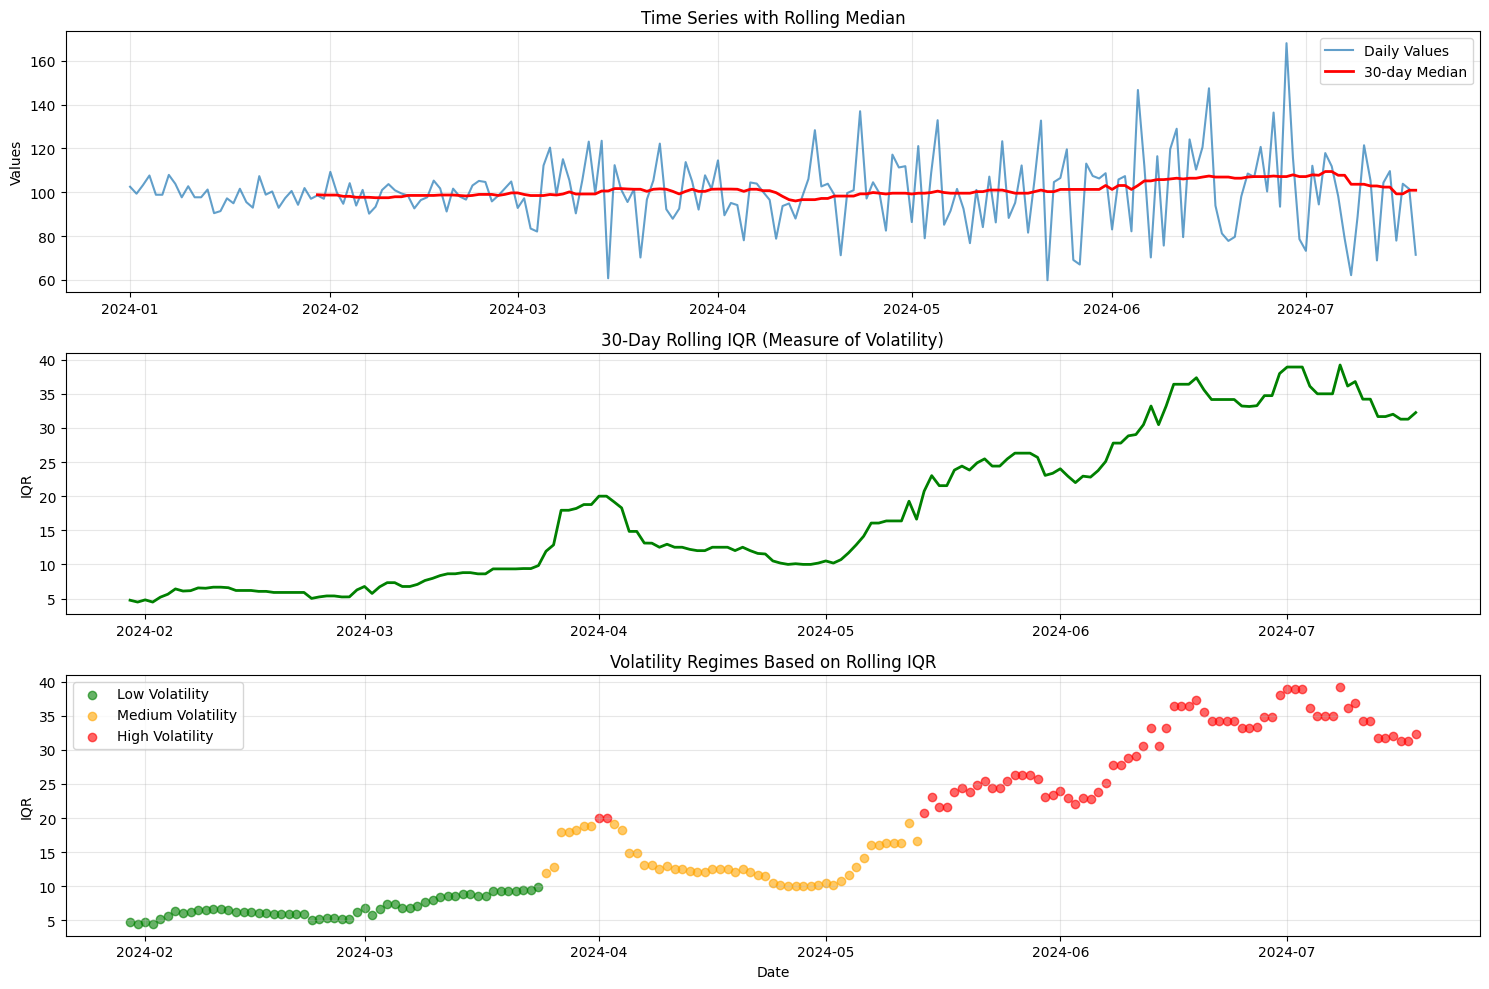


Volatility Regime Summary:
                        mean       std  count
volatility_regime                            
Low                 6.829083  1.498788     55
Medium             13.587531  2.899372     48
High               29.906322  5.737584     68


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rolling_iqr_analysis():
    """Analyze how IQR changes over time in a time series"""
    
    # Create time series data with changing volatility
    np.random.seed(42)
    dates = pd.date_range('2024-01-01', periods=200, freq='D')
    
    # Generate data with different volatility regimes
    low_vol = np.random.normal(100, 5, 60)      # Low volatility period
    med_vol = np.random.normal(100, 15, 80)     # Medium volatility period  
    high_vol = np.random.normal(100, 25, 60)    # High volatility period
    
    values = np.concatenate([low_vol, med_vol, high_vol])
    
    # Create DataFrame
    ts_data = pd.DataFrame({
        'date': dates,
        'value': values
    })
    ts_data = ts_data.set_index('date')
    
    # Calculate rolling IQR (30-day window)
    ts_data['rolling_q1'] = ts_data['value'].rolling(window=30).quantile(0.25)
    ts_data['rolling_q3'] = ts_data['value'].rolling(window=30).quantile(0.75)
    ts_data['rolling_iqr'] = ts_data['rolling_q3'] - ts_data['rolling_q1']
    ts_data['rolling_median'] = ts_data['value'].rolling(window=30).median()
    
    print("Time Series with Rolling IQR:")
    print(ts_data.tail(10))
    
    # Identify volatility regimes
    ts_data['volatility_regime'] = pd.cut(ts_data['rolling_iqr'], 
                                        bins=[0, 10, 20, float('inf')],
                                        labels=['Low', 'Medium', 'High'])
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Original time series
    plt.subplot(3, 1, 1)
    plt.plot(ts_data.index, ts_data['value'], alpha=0.7, label='Daily Values')
    plt.plot(ts_data.index, ts_data['rolling_median'], color='red', linewidth=2, label='30-day Median')
    plt.title('Time Series with Rolling Median')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Rolling IQR
    plt.subplot(3, 1, 2)
    plt.plot(ts_data.index, ts_data['rolling_iqr'], color='green', linewidth=2)
    plt.title('30-Day Rolling IQR (Measure of Volatility)')
    plt.ylabel('IQR')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Volatility regimes
    plt.subplot(3, 1, 3)
    colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
    for regime in ['Low', 'Medium', 'High']:
        regime_data = ts_data[ts_data['volatility_regime'] == regime]
        if not regime_data.empty:
            plt.scatter(regime_data.index, regime_data['rolling_iqr'], 
                       color=colors[regime], label=f'{regime} Volatility', alpha=0.6)
    plt.title('Volatility Regimes Based on Rolling IQR')
    plt.ylabel('IQR')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics by volatility regime
    regime_summary = ts_data.groupby('volatility_regime', observed=False)['rolling_iqr'].agg(['mean', 'std', 'count'])
    print("\nVolatility Regime Summary:")
    print(regime_summary)
    
    return ts_data

ts_data = rolling_iqr_analysis()

**Key Python Functions Summary**

| Method                                | Library | Usage                      | Best For                          |
|----------------------------------------|---------|----------------------------|-----------------------------------|
| `np.percentile(data, [25, 75])`        | NumPy   | Manual IQR calculation     | Custom percentile calculations    |
| `np.subtract(*np.percentile(data, [75, 25]))` | NumPy   | Direct IQR                 | One-line IQR calculation          |
| `pd.Series.quantile([0.25, 0.75])`     | pandas  | DataFrame operations       | Data analysis workflows           |
| `scipy.stats.iqr()`                    | SciPy   | Direct IQR function        | Statistical analysis              |
| `scipy.stats.scoreatpercentile()`      | SciPy   | Alternative method         | Compatibility with older versions |

Practical Insights
- Small IQR → Data is tightly clustered around the median
- Large IQR → Data is spread out in the middle 50%
- IQR > Range/2 → Data might be skewed or have outliers
- Use IQR instead of range when outliers are present
- Combine with median for robust data summaries

The IQR is your best friend when working with real-world data that often contains outliers and skewed distributions!

